In [114]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
from baseline import MultiMethod

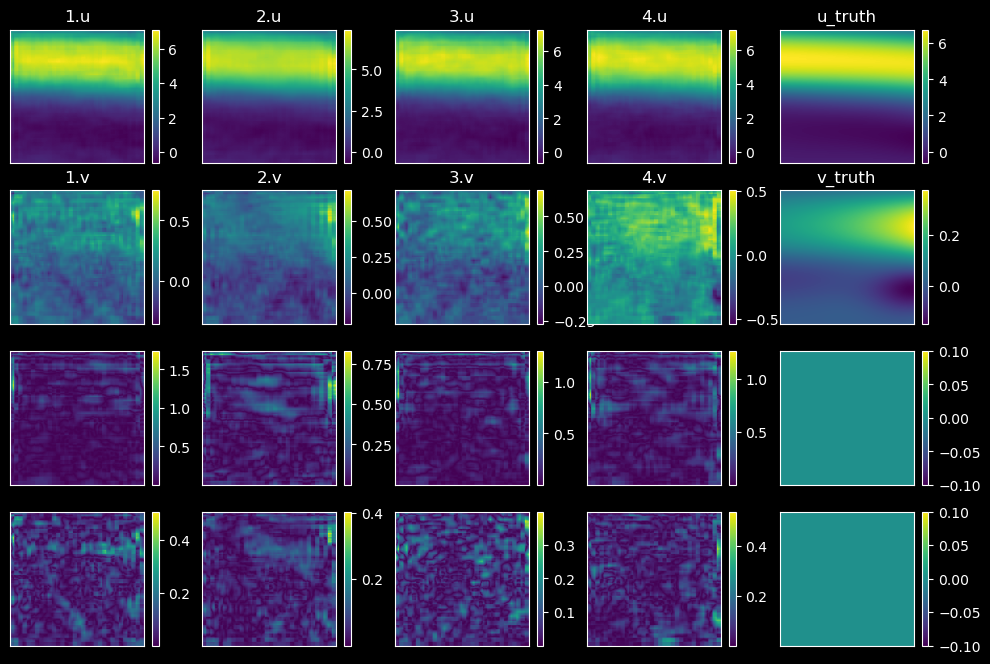

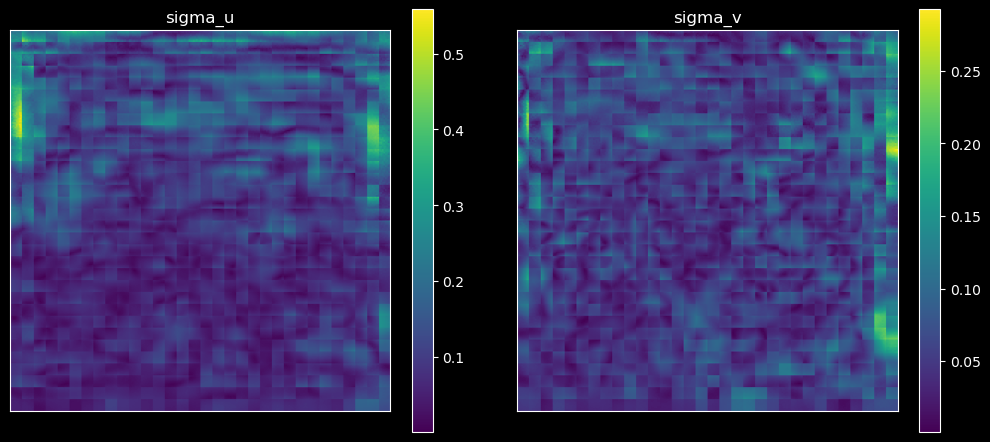

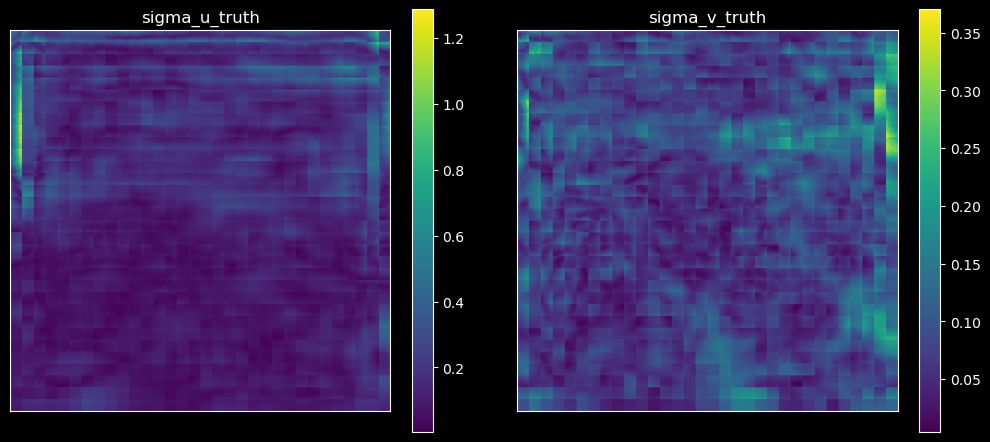

In [115]:
data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
datas = glob.glob(os.path.join(data_path, '*.npy'))
randomidx = np.random.permutation(len(datas))
datas = [datas[i] for i in randomidx]

baseline_1 = MultiMethod(datas[0], 0)
baseline_1.show()
sigma_u, sigma_v = baseline_1.std(show=1)
sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)

detransform has competed


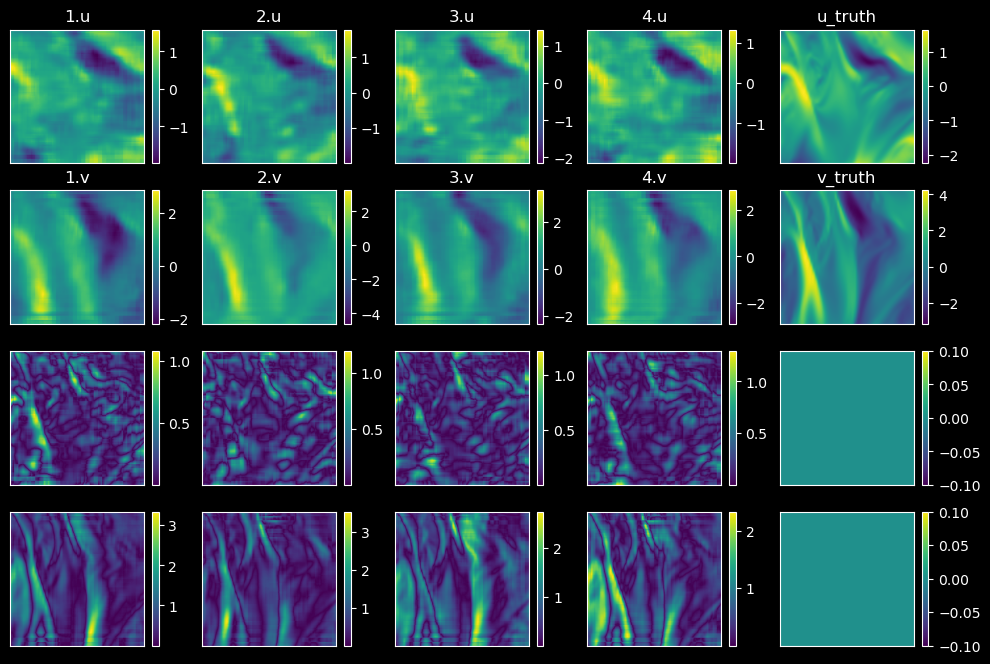

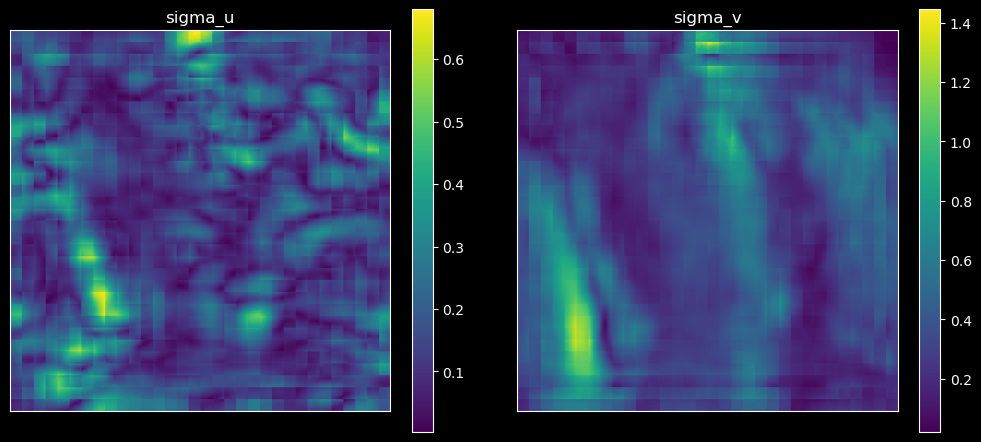

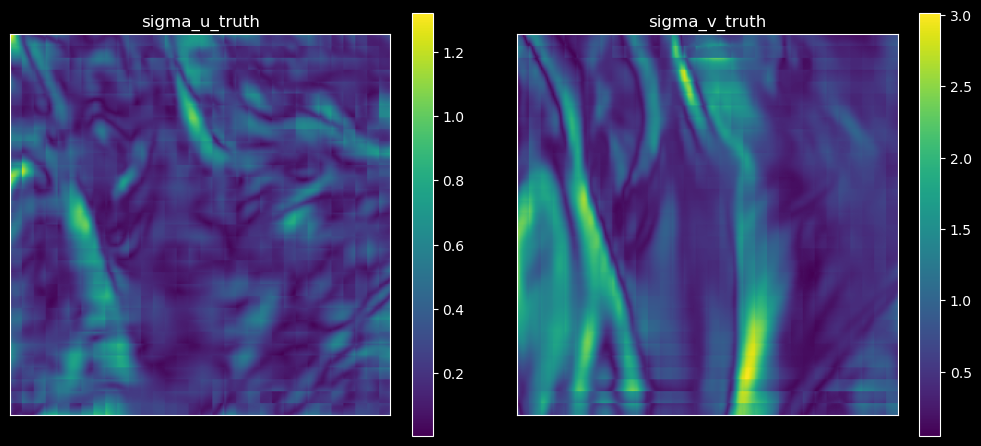

In [116]:
data_path = '/home/panding/code/UR/piv-data/baseline-multitransform'
datas = glob.glob(os.path.join(data_path, '*.npy'))
randomidx = np.random.permutation(len(datas))
datas = [datas[i] for i in randomidx]

baseline_1 = MultiMethod(datas[0], 1)
baseline_1.show()
sigma_u, sigma_v = baseline_1.std(show=1)
sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)

In [117]:
# path = '/home/panding/code/UR/piv-data/ur/backstep_Re800_00361.npy'
# data = np.load(path)
# img = data[0]

# img_rgb = np.zeros((256, 256, 3), dtype=np.float32)
# img_rgb[:, :, 0] = img
# img_rgb[:, :, 1] = img
# img_rgb[:, :, 2] = img

# plt.figure()
# plt.imshow(img)
# plt.show()
# plt.figure()
# plt.imshow(img_rgb)
# plt.show()